<font size="5">**<h1>PROYECTO INDIVIDUAL 02<h1>**
<font size="0.5"><h2>Modelos de Predicción en Machine Learning<h2>
<font size="0.5"><h2>Data Science Bootcamp-Soy Henry<h2>
Autor: Hector Javier Herrera Espínola


**Introducción: Estancia hospitalaria**

La hospitalización, o estancia hospitalaria, cuando es prolongada constituye una preocupación a nivel mundial debido a sus efectos negativos en el sistema de salud, aumentando los costos, generando deficiencia en la accesibilidad de prestación de servicios de salud, saturación de unidades de hospitalización y urgencias, por consiguiente, mayores efectos adversos como lo son las enfermedades intrahospitalarias.

El estudio de los procesos de atención en salud, así como el conocimiento de las características y perfiles de los usuarios con el objetivo de predecir la ocupación hospitalaria, es uno de los aspectos al que las autoridades de salud han prestado gran interés, pues permite no sólo garantizar los recursos necesarios para la atención del paciente, sino realizar ajustes respecto a la oferta y demanda de los servicios de salud y los implementos asociados.​

**Descripción del problema**

El objetivo de este proyecto es el de  predecir si un paciente tendrá una estancia hospitalaria prolongada o no, utilizando la información contenida en el dataset asociado, la cual recaba una muestra histórica de sus pacientes, para poder administrar la demanda de camas en el hospital según la condición de los pacientes recientemente ingresados.

Para esto, se define que un paciente posee estancia hospitalaria prolongada si ha estado hospitalizado más de 8 días.

**RESOLUCION DEL CASO**

En una primera instancia se realizará la carga de todas las liberías que se consideran necesarias para la resolución de la consigna.Posteriormente se procederá a cargar el dataset, para realizar un analisis exploratorio de Datos (EDA) con el fin de contar con la información prepara con fines de análisis.

In [13]:
#Se procede a importar las líberías a utilizarse

import numpy as np # Libería numpy para trabajar con arrays
import pandas as pd # Libería Pandas para trabajar con DataFrames
import matplotlib.pyplot as plt  #Librería de visualización
import seaborn as sns #Librería de visualización
from sklearn.linear_model import LinearRegression #Modelo de Regresión Líneal
from sklearn import preprocessing #Esta libería permite la simplificación de la exploración de datos.

Se procede con la carga de los datos del archivo "hospitalizaciones_train.cvs"

In [56]:
#Carga del data set
info_train = pd.read_csv("hospitalizaciones_train.csv")
info_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [58]:
#Detalles del dataser
info_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [8]:
#Verificación de valores nulos
info_train.isnull().sum()


Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

De acuerdo al enunciado, se debe crear una columna adicional en la que se establezca si un paciente se ha quedado más de 8 días hospitalizado

In [64]:
"""Esta programa determina la creación de una columna llamada Stay More Than 8 days y se crea mediante un array que indica 0 (en caso de ser falso) o 1 (en caso de ser verdadero)
donde los valores de la columna "Stay (in days)" sean mayores a 8."""

info_train['Stay More Than 8 Days'] = np.where(info_train['Stay (in days)']>8,1,0)


In [65]:
#Verifico que se agrego la columna
info_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),Stay More Than 8 Days
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34,1


In [66]:
#Al obtener la información del dataset se encuentra que cuentan con valores que no son numericos.
#Para obtener los mejores resultados en este analisis, se procederan a modificar los valores que no sean del tipo numericos a este tipo de valor.

encoder = preprocessing.LabelEncoder() #Se utiliza la librería preprocessing
for column in info_train.columns:
    if info_train[column].dtype != ('int32' or 'int64' or 'float'):
        info_train[column]=encoder.fit_transform(info_train[column])

In [67]:
#Nueva información sobre el DF
info_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Available Extra Rooms in Hospital  410000 non-null  int64
 1   Department                         410000 non-null  int32
 2   Ward_Facility_Code                 410000 non-null  int32
 3   doctor_name                        410000 non-null  int32
 4   staff_available                    410000 non-null  int64
 5   patientid                          410000 non-null  int64
 6   Age                                410000 non-null  int32
 7   gender                             410000 non-null  int32
 8   Type of Admission                  410000 non-null  int32
 9   Severity of Illness                410000 non-null  int32
 10  health_conditions                  410000 non-null  int32
 11  Visitors with Patient              410000 non-null  int64
 12  In

Debido a que el objetivo de la consiga es si la estadía debe ser mayor o menos que 8 días, podemos afrmar que la predicción es del tipo categorica, ya que tomará valores falsos o verdaderos.

Debido a la cantidad de información, se dene terminar la correlación que existen entre las variables existentes y la variable categorica creada "Stay More than 8 days", con el fin de establecer las que tienen mayor correlación con el fin de aplicarlo al modelo.
Se utiliza el mapa de calor de correlación Pearson


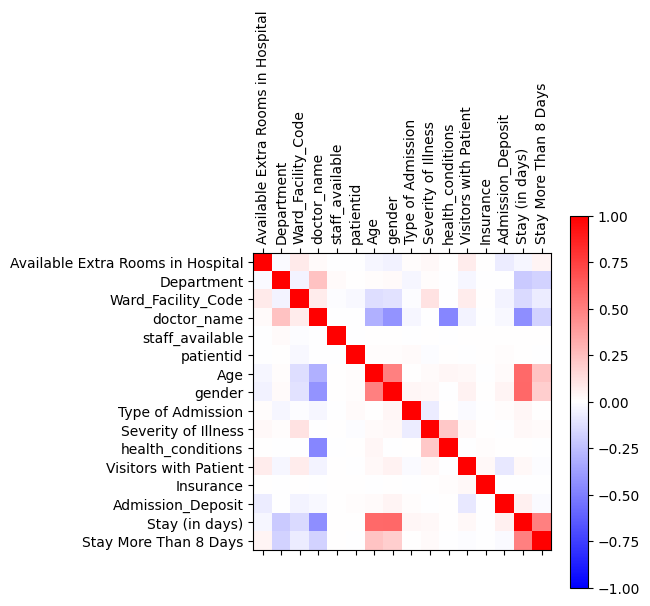

In [104]:
matriz = info_train.corr() #Cálculo delas correlaciones del dataframe para creación del mapa de calor
plt.matshow(matriz, cmap= 'bwr', vmin=-1,vmax=1)
plt.xticks(range(16), info_train.columns, rotation =90)
plt.yticks(range(16), info_train.columns)

        
plt.colorbar()
plt.show()


Como conclusión podemos determinar que las variables que tienen mayor correlación con nuestra variable categorica Stay More Than 8 Days son:
1) Stay in Days : En esta instancia no vamos a utilizar esta variable
2) Ward_Facility_Code
3) Age
4) Doctor Name


In [121]:
important_features = info_train[['Ward_Facility_Code','Age', 'doctor_name',"gender"]]

Con la determinación de la correlación de las variables, procedemos a la elección de los modelos de machine learning.
Para la elección de debe evaluar la precisión del mismo y se procederá a realizar la predicción con aquel que tenga la precisión más alta


ARBOL DE DECISION

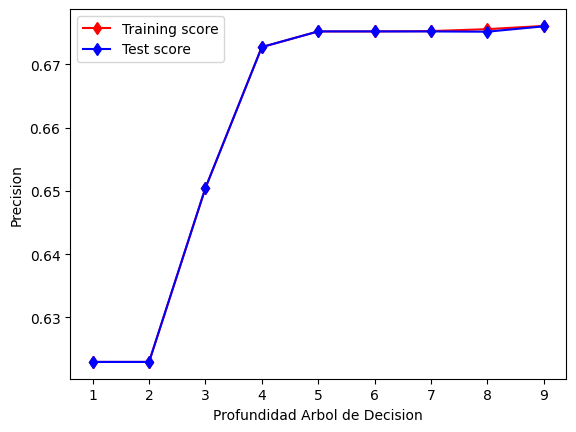

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_validate
from IPython.display import clear_output

tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

y=info_train["Stay More Than 8 Days"]
x=important_features

profundidades = np.arange(1,10,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    tree_decision = DecisionTreeClassifier(max_depth=profundidad,random_state = 35)
    tree_scores = cross_validate(tree_decision, x, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)

plt.plot(profundidades, tree_train_scores_mean, marker="d", linestyle="-" ,color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean,marker="d", linestyle="-"  ,color="b",
         label="Test score")

plt.legend()
plt.ylabel('Precision')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

Precisión en el set de train: 0.6731219512195122
Precisión en el set de testeo: 0.6718943089430894


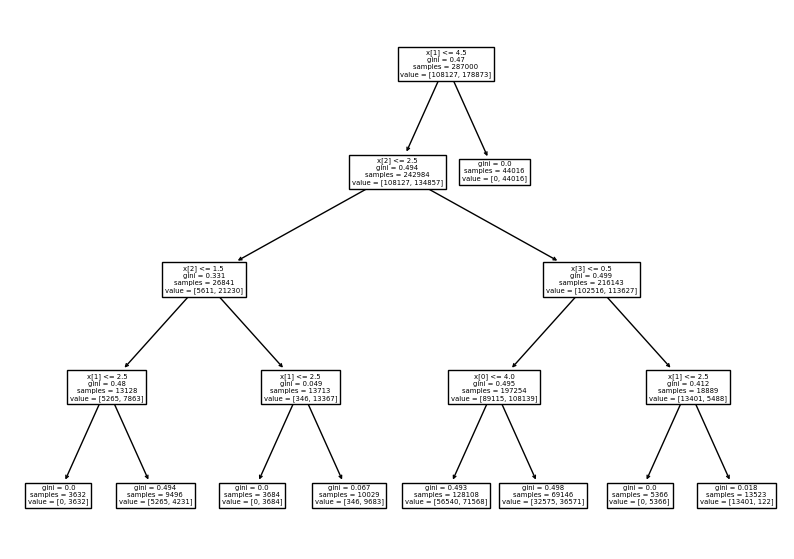

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=42)

tree_decision = DecisionTreeClassifier (max_depth = 4, random_state = 50) #Valorde profundiada por defecto 4

tree_decision.fit(x_train,y_train)
print(f'Precisión en el set de train: {tree_decision.score(x_train,y_train)}')
print(f'Precisión en el set de testeo: {accuracy_score(tree_decision.predict(x_test),y_test)}')

plt.figure(figsize=(10,7))
tree.plot_tree(tree_decision.fit(x_train,y_train))
plt.show()

In [124]:
for i in range(len(important_features.columns)):
    print(important_features.columns[i],tree_decision.feature_importances_[i])

Ward_Facility_Code 0.002521040889453337
Age 0.758369194191872
doctor_name 0.16654741491780836
gender 0.07256235000086625


REGRESION LOGISTICA

In [137]:
from sklearn.linear_model import LogisticRegression
logistical_regression = LogisticRegression()
logistical_regression.fit(x,y)
from sklearn.metrics import accuracy_score 
y_pred = logistical_regression.predict(x)
print('El accuracy del modelo es:', accuracy_score(y, y_pred))

El accuracy del modelo es: 0.6023634146341463


Matriz de Confusión

Se utiliza para analizar la precisión de las predicciones del modelo con los valores reales.

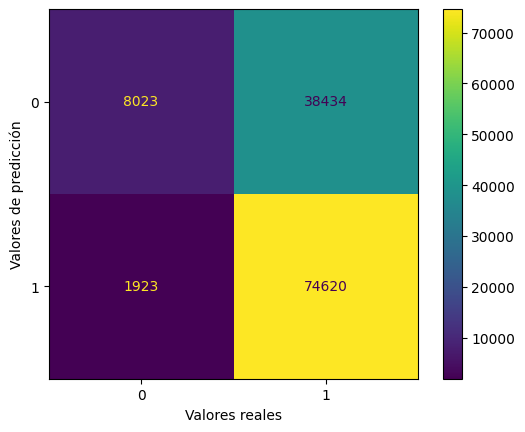

In [130]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score

y_train_pred = tree_decision.predict(x_train)
y_test_pred = tree_decision.predict(x_test)

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)

cm_display_2.plot()
plt.xlabel('Valores reales')
plt.ylabel('Valores de predicción')
plt.show()

In [131]:
#Metricas de Accuracy
#Accuracy
exactitud = accuracy_score(y_test, y_test_pred)
print('Precision:', exactitud)

Precision: 0.6718943089430894


In [132]:
#Recall
precision = recall_score(y_test, y_test_pred)
print('Precicisón:', precision)

Precicisón: 0.97487686659786


Creación del Pipeline

In [138]:
# Importamos las librerías necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import tree

# Creamos los pipelines
#1
pipe_dt = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', DecisionTreeClassifier(random_state=42))])

#2 
pipe_lr = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', LogisticRegression(random_state=42))])

# Los guardamos en una lista
pipelines = [pipe_dt,pipe_lr]

# Hacemos un diccionario para fines organizativos
pipe_dict = {0: 'Arbol Decision', 1: 'Regresión Logistica'}

# Entrenamos   x_train, x_test, y_train, y_test
for pipe in pipelines:
    pipe.fit(x_train, y_train)

# Evaluamos
for idx, val in enumerate(pipelines):
    print('%s pipeline accuracy en test: %.3f' % (pipe_dict[idx], val.score(x_test, y_test)))

# Identificamos el mejor modelo para el set de testeo
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
    if val.score(x_test, y_test) > best_acc:
        best_acc = val.score(x_test, y_test)
        best_pipe = val
        best_clf = idx
print('Modelo con el mejor accuracy: %s' % pipe_dict[best_clf])

# Guardamos el pipeline en un archivo
import joblib #pickle es alternativa

joblib.dump(best_pipe, 'Pipeline_seleccionado.pkl', compress=1)
print('Pipeline de %s guardado a archivo' % pipe_dict[best_clf])

best_model = joblib.load('Pipeline_seleccionado.pkl')

best_model.fit(x_train,y_train)
best_model.score(x_test, y_test)

Arbol Decision pipeline accuracy en test: 0.675
Regresión Logistica pipeline accuracy en test: 0.607
Modelo con el mejor accuracy: Arbol Decision
Pipeline de Arbol Decision guardado a archivo


0.6750813008130081

Trabajo Predictivo
Se procede a a importsr los datos de "hospitalizaciones_test.csv"

In [141]:
info_test = pd.read_csv('hospitalizaciones_test.csv')

#Normalización de columnas tipo string, todo en minúsculas
for column in info_test.columns:
    if info_test[column].dtype == ('object'):
        info_test[column]=info_test[column].str.lower()

#Cambio de variables string a números
encoder = preprocessing.LabelEncoder()
for column in info_test.columns:
    if info_test[column].dtype != ('int64' or 'float'):
        info_test[column]=encoder.fit_transform(info_test[column])
        
info_test.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,1,5,4,10,2858,2,0,1,2,5,2,0,52469
1,2,4,4,1,4,65657,5,0,1,2,0,2,1,24227
2,2,2,4,1,7,45598,5,2,1,2,4,3,0,75017
3,2,1,5,4,1,31132,2,0,1,2,4,2,1,19861
4,2,0,0,1,7,125021,5,0,1,0,1,2,0,53798


In [142]:
important_features = info_test[['Ward_Facility_Code','Age', 'doctor_name',"gender"]]
y = tree_decision.predict(important_features)
prediction = pd.DataFrame(y.reshape(-1,1), columns=['pred'])
prediction.to_csv('hectorherreraespinola(01).csv', index=False)

c:\Users\herre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
